In [20]:
import os
from utils import config
import numpy as np
import matplotlib.pyplot as plt

In [21]:
date = "2019-03-16 18:09:59"
filepath = os.path.abspath(os.path.join(config().sim.output.path, date))
n_agents = config().learning.n_processes

print(filepath)

/run/media/bdvllrs/Data/Documents/Supelec/OMA/RL/Projet/videos/2019-03-16 18:09:59


In [22]:
returns = []
losses = []
to_numpy = lambda x: x.item()
for idx in range(1, n_agents + 1):
    losses.append(np.load(filepath + f"/metrics_agent_{idx}_losses.npy"))
    returns.append(list(map(to_numpy, np.load(filepath + f"/metrics_agent_{idx}_returns.npy"))))
    
losses = losses[0]

In [23]:
def moving_average(data, N=10):
    cumsum, moving_aves = [0], []
    std = []

    for i, x in enumerate(returns[0], 1):
        cumsum.append(cumsum[i-1] + x)
        if i>=N:
            moving_ave = (cumsum[i] - cumsum[i-N])/N
            #can do stuff with moving_ave here
            moving_aves.append(moving_ave)
            std.append(np.std(data[i-N:i]))
    return np.array(moving_aves), np.array(std)

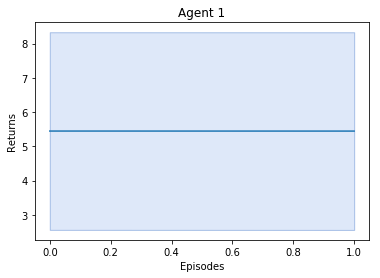

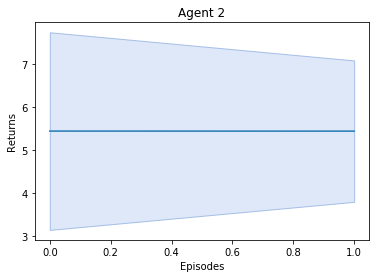

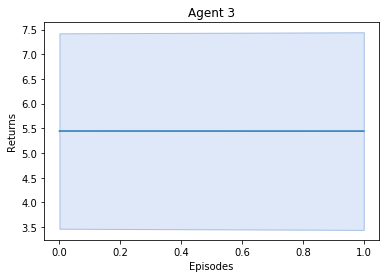

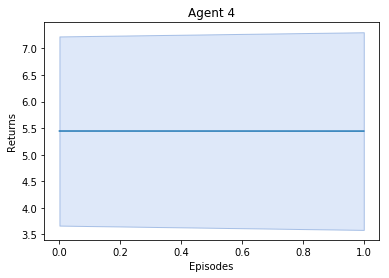

In [24]:
for idx in range(n_agents):
    mean, std = moving_average(returns[idx])
    t = range(0, len(mean))
    plt.figure()
    plt.plot(t, mean)
    plt.fill_between(t, mean-std, mean+std, alpha=0.5, edgecolor='#608cd1', facecolor='#bed3f4')
    plt.xlabel("Episodes")
    plt.ylabel("Returns")
    plt.title(f"Agent {idx + 1}")
    plt.savefig(filepath + f"/returns_agent_{idx+1}.eps", type="eps", dpi=1000)
    plt.show()

In [40]:
total_loss = []
ac_loss = []
inverse_loss = []
forward_loss = []

for l in losses:
    total_loss.append(l[0])
    ac_loss.append(l[1])
    inverse_loss.append(l[2])
    forward_loss.append(l[3])

[[ 5.16291189e+00  5.15846100e+01  1.68373995e-02  1.35441869e-03]
 [-6.18686724e+00 -6.19218903e+01  1.92731004e-02  1.83446030e-03]
 [-6.52370501e+00 -6.53731766e+01  4.91490178e-02  4.72841505e-03]
 [ 5.91267765e-01  5.85538483e+00  1.73677988e-02  2.81963754e-03]
 [-6.47519588e-01 -6.52754450e+00  1.39336400e-02  3.06023308e-03]
 [ 4.71072388e+00  4.70463486e+01  2.20978539e-02  2.08639028e-03]
 [ 5.26506662e+00  5.25978851e+01  2.24404987e-02  9.87267355e-04]
 [ 4.97416019e+00  4.96582375e+01  3.25172096e-02  2.29127379e-03]
 [-2.43580222e+00 -2.44351730e+01  2.62671616e-02  3.07725393e-03]
 [ 1.77466854e-01  1.64805055e+00  2.58382503e-02  9.36769322e-03]
 [-2.21050692e+00 -2.22006626e+01  1.56755522e-02  8.03044159e-03]]


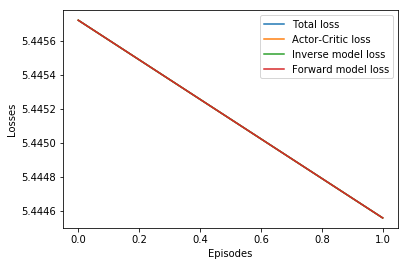

In [42]:
total_loss, _ = moving_average(total_loss)
ac_loss, _ = moving_average(ac_loss)
inverse_loss, _ = moving_average(inverse_loss)
forward_loss, _ = moving_average(forward_loss)
t = range(0, len(total_loss))
plt.figure()
plt.plot(t, total_loss, label="Total loss")
plt.plot(t, ac_loss, label="Actor-Critic loss")
plt.plot(t, inverse_loss, label="Inverse model loss")
plt.plot(t, forward_loss, label="Forward model loss")
plt.legend()
plt.xlabel("Episodes")
plt.ylabel("Losses")
plt.savefig(filepath + "/losses.eps", type="eps", dpi=1000)
plt.show()